# Keras Upgrade

In [1]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


# Letter recognition (small size)

> Indeed, I once even proposed that the toughest challenge facing AI workers is to answer the question: “What are the letters ‘A’ and ‘I’? - [Douglas R. Hofstadter](https://web.stanford.edu/group/SHR/4-2/text/hofstadter.html) (1995)


## notMNIST


Data source: [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) (you need to download `notMNIST_small.mat` file):

![](http://yaroslavvb.com/upload/notMNIST/nmn.png)

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.


## So, why not MNIST?

Many introductions to image classification with deep learning start with MNIST, a standard dataset of handwritten digits. This is unfortunate. Not only does it not produce a “Wow!” effect or show where deep learning shines, but it also can be solved with shallow machine learning techniques. In this case, plain k-Nearest Neighbors produces more than 97% accuracy (or even 99.5% with some data preprocessing!). Moreover, MNIST is not a typical image dataset – and mastering it is unlikely to teach you transferable skills that would be useful for other classification problems

> Many good ideas will not work well on MNIST (e.g. batch norm). Inversely many bad ideas may work on MNIST and no[t] transfer to real [computer vision]. - [François Chollet’s tweet](https://twitter.com/fchollet/status/852594987527045120)

In [2]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2024-04-07 12:52:56--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: ‘notMNIST_small.mat’

notMNIST_small.mat  100%[===================>] 112.14M  14.9MB/s    in 8.5s    

2024-04-07 12:53:05 (13.2 MB/s) - ‘notMNIST_small.mat’ saved [117586976/117586976]



In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import io

## Data Loading

In [4]:
data = io.loadmat('notMNIST_small.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 10 11:38:32 2011',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223.

In [5]:
x = data['images']
y = data['labels']

In [6]:
x.shape, y.shape

((28, 28, 18724), (18724,))

In [7]:
resolution = 28
classes = 10

x = np.transpose(x, (2, 0, 1))
print(x.shape)
x = x.reshape( (-1, resolution, resolution, 1) )

(18724, 28, 28)


In [8]:
# sample, x, y, channel
x.shape, y.shape

((18724, 28, 28, 1), (18724,))

* 데이터 살펴보기

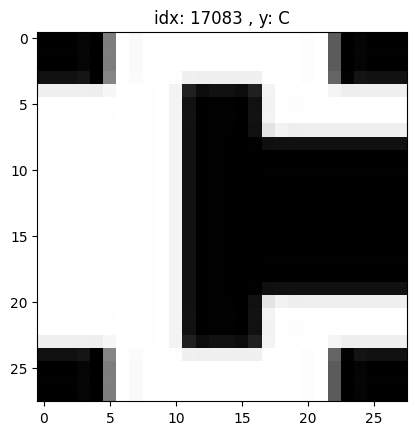

In [9]:
rand_i = np.random.randint(0, x.shape[0])

plt.title( f'idx: {rand_i} , y: {"ABCDEFGHIJ"[ int(y[rand_i]) ]}' )
plt.imshow( x[rand_i, :, :, 0], cmap='gray' )
plt.show()

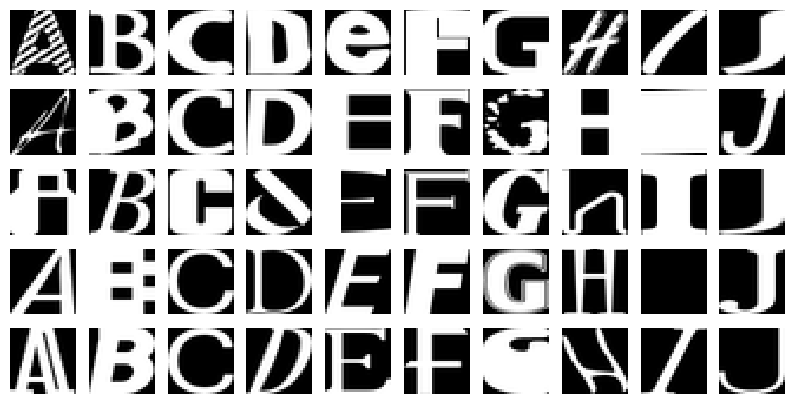

In [10]:
rows = 5
fig, axes = plt.subplots(rows, classes, figsize=(classes,rows))

for letter_id in range(classes) :
    letters = x[y==letter_id]      # 0부터 9까지 각 숫자에 맞는 array가 letters에 들어간다.
    letters_len = len(letters)

    for row_i in range(rows) :
        axe = axes[row_i, letter_id]
        axe.imshow( letters[np.random.randint(letters_len)], cmap='gray', interpolation='none')
        axe.axis('off')

## Data Preprocessing

* Data split

    - training set : test set = 8 : 2
    - 재현을 위한 난수 고정 : 2023

In [11]:
x.shape, y.shape

((18724, 28, 28, 1), (18724,))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2024)

In [14]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((14979, 28, 28, 1), (14979,), (3745, 28, 28, 1), (3745,))

* Scaling

    - min-max scaling

In [15]:
max_n, min_n = train_x.max(), train_x.min()

In [16]:
max_n, min_n

(255.0, 0.0)

In [17]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [18]:
train_x.max(), train_x.min()

(1.0, 0.0)

* One-hot encoding

In [19]:
from keras.utils import to_categorical

In [20]:
class_n = len(np.unique(train_y))

In [21]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

* Data shape 재확인

In [22]:
train_x.shape, train_y.shape

((14979, 28, 28, 1), (14979, 10))

## Modeling
- 조건
    1. Sequential API, Functional API 중 택일
    2. Flatten Layer 사용할 것
    3. Activation Function이 주어진 Dense Layer 뒤에 BatchNormalization 사용할 것
    4. Dropout을 0.2 정도로 사용할 것
    5. Early Stopping을 사용할 것

In [23]:
import keras

In [24]:
keras.__version__

'3.1.1'

In [25]:
## Functional API
# 1. 세션 클리어 : 메모리에 기존 모델 구조가 남아있으면 정리해줘.
keras.backend.clear_session()

# 2. 레이어 사슬처럼 엮기
il = keras.layers.Input(shape=(28,28,1) )
hl = keras.layers.Flatten()(il)
hl = keras.layers.Dense(256, activation='relu')(hl)
hl = keras.layers.Dense(256, activation='relu')(hl)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.2)(hl)

hl = keras.layers.Dense(128, activation='relu')(hl)
hl = keras.layers.Dense(128, activation='relu')(hl)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.2)(hl)

hl = keras.layers.Dense(64, activation='relu')(hl)
hl = keras.layers.Dense(64, activation='relu')(hl)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.2)(hl)

ol = keras.layers.Dense(10, activation='softmax')(hl)

# 3. 모델의 시작과 끝 지정
model = keras.models.Model(il, ol)

# 4. 컴파일
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )

# 양념
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 331,018 (1.26 MB)

 Trainable params: 330,122 (1.26 MB)

 Non-trainable params: 896 (3.50 KB)

* Early stopping

In [26]:
from keras.callbacks import EarlyStopping

In [27]:
es = EarlyStopping(monitor='val_loss',       # 얼리스토핑을 적용할 관측 대상
                   min_delta=0,              # Threshold. 설정한 값보다 크게 변해야 성능 개선 간주!
                   patience=3,               # 성능 개선이 이뤄지지 않을 때 몇 번 더 지켜볼 것인가.
                   verbose=1,                # 어느 epoch에서 얼리스토핑이 적용되었는지 보여줌
                   restore_best_weights=True # 가장 성능이 좋은 시점의 epoch 가중치로 돌려줌!
                   )

* .fit( )

In [28]:
model.fit(train_x, train_y,
          epochs=10000, verbose=1,
          validation_split=0.2,      # 매 epoch마다 랜덤하게 20%를 validation 데이터로 사용!
          callbacks=[es]
          )

Epoch 1/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5714 - loss: 1.3496 - val_accuracy: 0.8732 - val_loss: 0.4564
Epoch 2/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8504 - loss: 0.5041 - val_accuracy: 0.8745 - val_loss: 0.4320
Epoch 3/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8721 - loss: 0.4539 - val_accuracy: 0.8895 - val_loss: 0.3669
Epoch 4/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8865 - loss: 0.3918 - val_accuracy: 0.9005 - val_loss: 0.3477
Epoch 5/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8996 - loss: 0.3414 - val_accuracy: 0.9015 - val_loss: 0.3344
Epoch 6/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9074 - loss: 0.3293 - val_accuracy: 0.8912 - val_loss: 0.3511
Epoch 7/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9091 - loss: 0.3052 - val_accuracy: 0.9052 - val_loss: 0.3369
Epoch 8/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9202 - loss:

* .evaluate( )

In [29]:
model.evaluate(test_x, test_y)

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9144 - loss: 0.2824


[0.2965351641178131, 0.9078771471977234]

* .predict( )

In [30]:
y_pred = model.predict(test_x)

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [31]:
y_pred[:2]

array([[9.9865329e-01, 6.0556071e-05, 3.6929385e-05, 3.5293589e-05,
        2.0388694e-04, 5.2270695e-04, 1.6412167e-05, 3.8643411e-04,
        5.7455996e-05, 2.6947737e-05],
       [2.4508787e-03, 1.1463964e-02, 4.4740387e-03, 1.0769151e-02,
        6.6880253e-03, 9.2347753e-01, 8.0617722e-03, 2.7228533e-03,
        7.3598595e-03, 2.2531830e-02]], dtype=float32)

In [32]:
test_y.shape

(3745, 10)

In [33]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.argmax(test_y, axis=1)

In [34]:
y_pred_arg.shape

(3745,)

* 평가 지표

In [35]:
from sklearn.metrics import accuracy_score, classification_report

In [36]:
accuracy_score(test_y_arg, y_pred_arg)

0.9078771695594126

In [37]:
classes = ['A','B','C','D','E','F','G','H','I','J']

print( classification_report(test_y_arg, y_pred_arg, target_names=classes) )

              precision    recall  f1-score   support

           A       0.86      0.93      0.89       360
           B       0.92      0.88      0.90       382
           C       0.92      0.94      0.93       385
           D       0.85      0.94      0.89       373
           E       0.95      0.85      0.90       364
           F       0.92      0.95      0.94       392
           G       0.92      0.87      0.90       390
           H       0.93      0.90      0.92       364
           I       0.90      0.85      0.88       360
           J       0.90      0.95      0.93       375

    accuracy                           0.91      3745
   macro avg       0.91      0.91      0.91      3745
weighted avg       0.91      0.91      0.91      3745



## Visualization

* 실제 데이터 확인

idx = 1978
해당 인덱스의 이미지는 I
모델의 예측 : I
모델의 클래스별 확률 : 
-------------------
A 0.0
B 0.0
C 0.0
D 0.0
E 0.0
F 0.0
G 0.0
H 0.0
I 99.0
J 0.0
정답


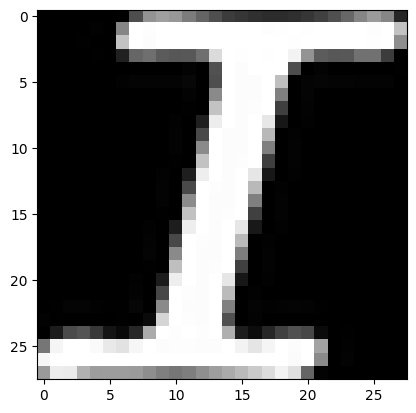

In [38]:
letters_str = "ABCDEFGHIJ"

rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx], cmap='gray')
plt.show()

* 틀린 이미지만 확인해보기

In [39]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

345

idx = 2019
해당 인덱스의 이미지는 J
모델의 예측 : H
모델의 클래스별 확률 : 
-------------------
A 9.0
B 5.0
C 13.0
D 12.0
E 10.0
F 1.0
G 14.0
H 17.0
I 13.0
J 1.0
땡


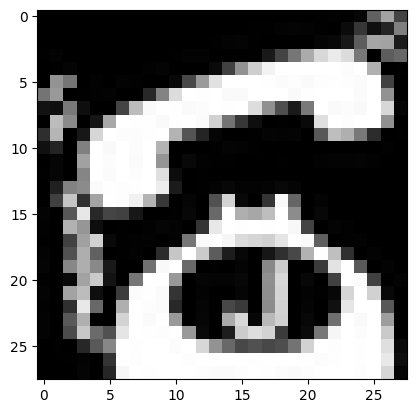

In [40]:
letters_str = "ABCDEFGHIJ"

rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx], cmap='gray')
plt.show()